# Test Técnico - Procesamiento de Imagenes en Python

## Objetivos

- **Ajustar la imagen** denominada Test1.jpg a un tamaño de 1024x1024 pixeles
  
- **Partir la imagen:** La imagen modificada se deberá partir en 4 sub-imágenes que correspondan a 4 secciones o cuadrantes de la imagen original y se deberán graficar cada una de estas imágenes
  
- **Aplicar una ecualización** a la imagen y mostrar la gráfica resultante para cada color
  
- **Manipulación de imágenes binarias:** Dada la imagen Mask.png realizar el conteo del total de objetos binarios (células) determinar el promedio del área de los objetos y aplicar una operación morfológica de apertura
  
- **Combinar Imágenes:** Fusionar las dos imágenes y presentar una nueva imagen en donde las máscaras se observen en un color específico dentro de la imagen original Test: ejemplo color azul

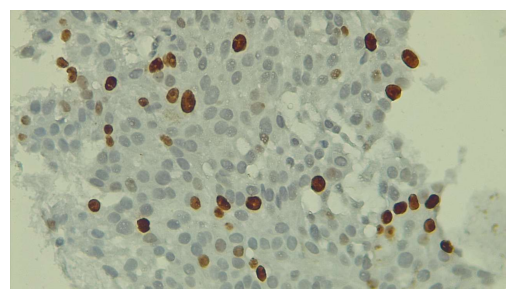

In [106]:
# visualizar la imagen como output 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)

## Clase ImageProcessing

In [107]:
import cv2
import matplotlib.pyplot as plt

class Preprocess:
    def __init__(self, img=None, img_name=None):
        """
        Inicializa la clase con la imagen y su nombre. 
        """
        self.img = img
        self.img_name = img_name

    def read(self, img_name):
        """
        Leer una imagen desde un archivo y asignarla a la clase.
        """
        self.img = cv2.imread(img_name)
        self.img_name = img_name
        return self.img

    def show(self, img=None, title="Imagen", show_histogram=False):
        """
        Mostrar una imagen y opcionalmente los histogramas de cada canal de color.
        """
        if img is None:
            img = self.img
            
        if show_histogram:
            # Crear una figura con dos filas: una para la imagen, otra para los histogramas
            plt.figure(figsize=(16, 8))
            
            # Mostrar la imagen
            plt.subplot(2, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis("off")
            
            # Colores para los histogramas
            colors = ['blue', 'green', 'red']
            
            # Graficar los histogramas de cada canal
            for i, color in enumerate(colors):
                channel = img[:, :, i]  # Extraer canal de color
                plt.subplot(2, 2, i + 2)  # Posiciones 2, 3, 4 para los histogramas
                plt.hist(channel.ravel(), bins=256, color=color, alpha=0.6)
                plt.title(f"Histograma ({color.capitalize()})")
                plt.xlim([0, 256])
            
            # Ajustar los espacios entre subplots
            plt.tight_layout()
            plt.show()
        else:
            # Solo mostrar la imagen si no se requiere el histograma
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis("off")
            plt.show()

    def save(self, img=None, suffix="processed"):
        """
        Guardar una imagen con un sufijo añadido al nombre original.
        """
        if img is None:
            img = self.img

        # Crear el nuevo nombre con el sufijo
        base_name = self.img_name.split('.')[0]
        ext = self.img_name.split('.')[-1]
        new_name = f"{base_name}_{suffix}.{ext}"
        cv2.imwrite(new_name, img)
        print(f"Imagen guardada como: {new_name}")
        return new_name

    def size(self):
        """
        Obtener el tamaño de la imagen.
        """
        return self.img.shape

    def resize(self, width=1024, height=1024):
        """
        Ajustar la imagen al tamaño especificado (por defecto 1024x1024 píxeles)
        y guardar el archivo con '_resize' añadido al nombre original.
        """
        # Redimensionar la imagen
        self.img = cv2.resize(self.img, (width, height))
        # Usar el método save para guardar la imagen redimensionada
        return self.save(suffix="resize")

    def split(self, quadrants=4):
        """
        Dividir la imagen en cuadrantes.
        """
        # Validar que quadrants sea un cuadrado perfecto
        sqrt_q = int(np.sqrt(quadrants))
        if sqrt_q ** 2 != quadrants:
            raise ValueError("El parámetro 'quadrants' debe ser un número cuadrado perfecto (4, 9, 16, ...).")

        # Obtener dimensiones de la imagen
        height, width, _ = self.img.shape
        h_step = height // sqrt_q
        w_step = width // sqrt_q

        # Lista para almacenar los cuadrantes
        quadrants_list = []

        # Dividir la imagen en cuadrantes
        for i in range(sqrt_q):
            for j in range(sqrt_q):
                # Extraer subimagen (cuadrante)
                quadrant = self.img[i * h_step:(i + 1) * h_step, j * w_step:(j + 1) * w_step]
                quadrants_list.append(quadrant)
        
        return quadrants_list
    
    def plot_quadrants(self, quadrants=4):
        """
        Dividir la imagen en cuadrantes y graficarlos.
        """
        # Obtener los cuadrantes
        quadrant_images = self.split(quadrants)
        sqrt_q = int(quadrants**0.5)

        # Crear una figura para mostrar los cuadrantes
        fig, axes = plt.subplots(sqrt_q, sqrt_q, figsize=(10, 10))
        axes = axes.flatten()  # Aplanar para iterar más fácilmente

        # Graficar cada cuadrante
        for i, (ax, quad) in enumerate(zip(axes, quadrant_images)):
            ax.imshow(cv2.cvtColor(quad, cv2.COLOR_BGR2RGB))  # Convertir a RGB
            ax.axis("off")  # Quitar los ejes
            ax.set_title(f"Cuadrante {i+1}")

        # Ajustar espacio entre subplots
        plt.tight_layout()
        plt.show()

    def apply_clahe(self, clip_limit=2.0, tile_grid_size=(8, 8)):
        """
        Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization) 
        a la imagen.
        """
        # Convertir la imagen a espacio de color LAB
        lab = cv2.cvtColor(self.img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)

        # Crear el objeto CLAHE y aplicarlo al canal L (luminosidad)
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        l_clahe = clahe.apply(l)

        # Fusionar los canales nuevamente
        lab_clahe = cv2.merge((l_clahe, a, b))
        img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

        # Retornar la imagen procesada
        return img_clahe

### 1. Ajustar la imagen `Test1.jpg` a un tamaño de 1024x1024 pixeles

Tamaño original: (720, 1280, 3)


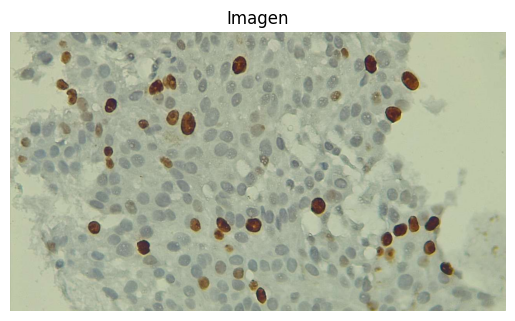

Imagen guardada como: Test1_resize.jpg
Tamaño imagen redimesionada: (1024, 1024, 3)


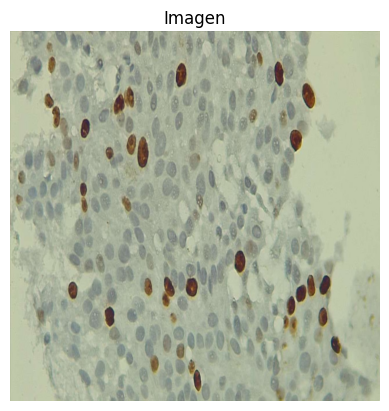

In [108]:
# Crear una instancia de la clase
preprocessor = Preprocess()

# Leer una imagen directamente desde un archivo
preprocessor.read('Test1.jpg')

# Ver el tamaño de la imagen
print("Tamaño original:", preprocessor.size())

# Mostrar la imagen
preprocessor.show()

# Redimensionar la imagen
resized_name = preprocessor.resize(1024, 1024)
print("Tamaño imagen redimesionada:", preprocessor.size())

# Mostrar la imagen redimensionada
preprocessor.read(resized_name)  # Leer la imagen redimensionada
preprocessor.show()

### 2. Partir la imagen en 4 sub-imágenes

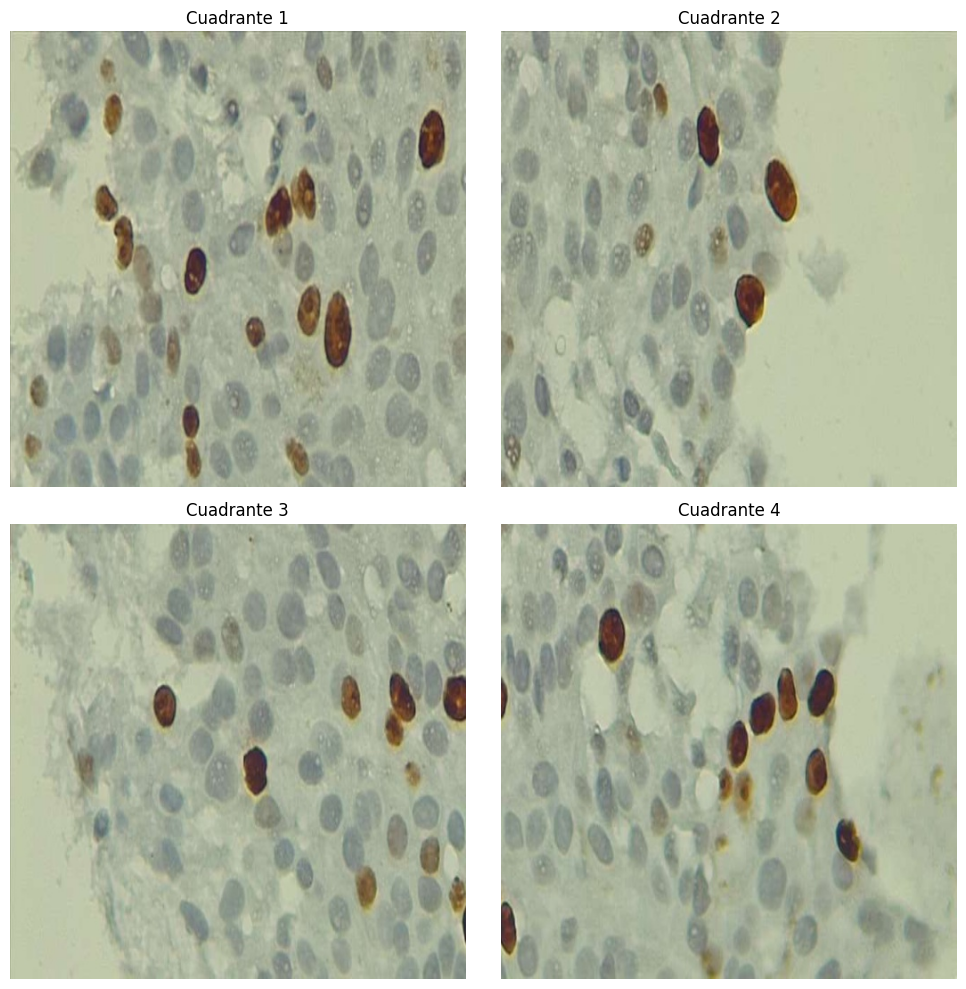

In [109]:
# Dividir la imagen en 4 cuadrantes
preprocessor.split(4)

# Graficar los cuadrantes (4 en este caso)
preprocessor.plot_quadrants(quadrants=4)


### 3. Aplicar una ecualización a la imagen y mostrar la gráfica resultante para cada color

**Objetivo:** Mejorar la calidad visual de la imagen ajustando el contraste de sus canales de color para obtener una representación más equilibrada. Esto se logra mediante ecualización de histograma, que redistribuye los niveles de intensidad de manera uniforme.

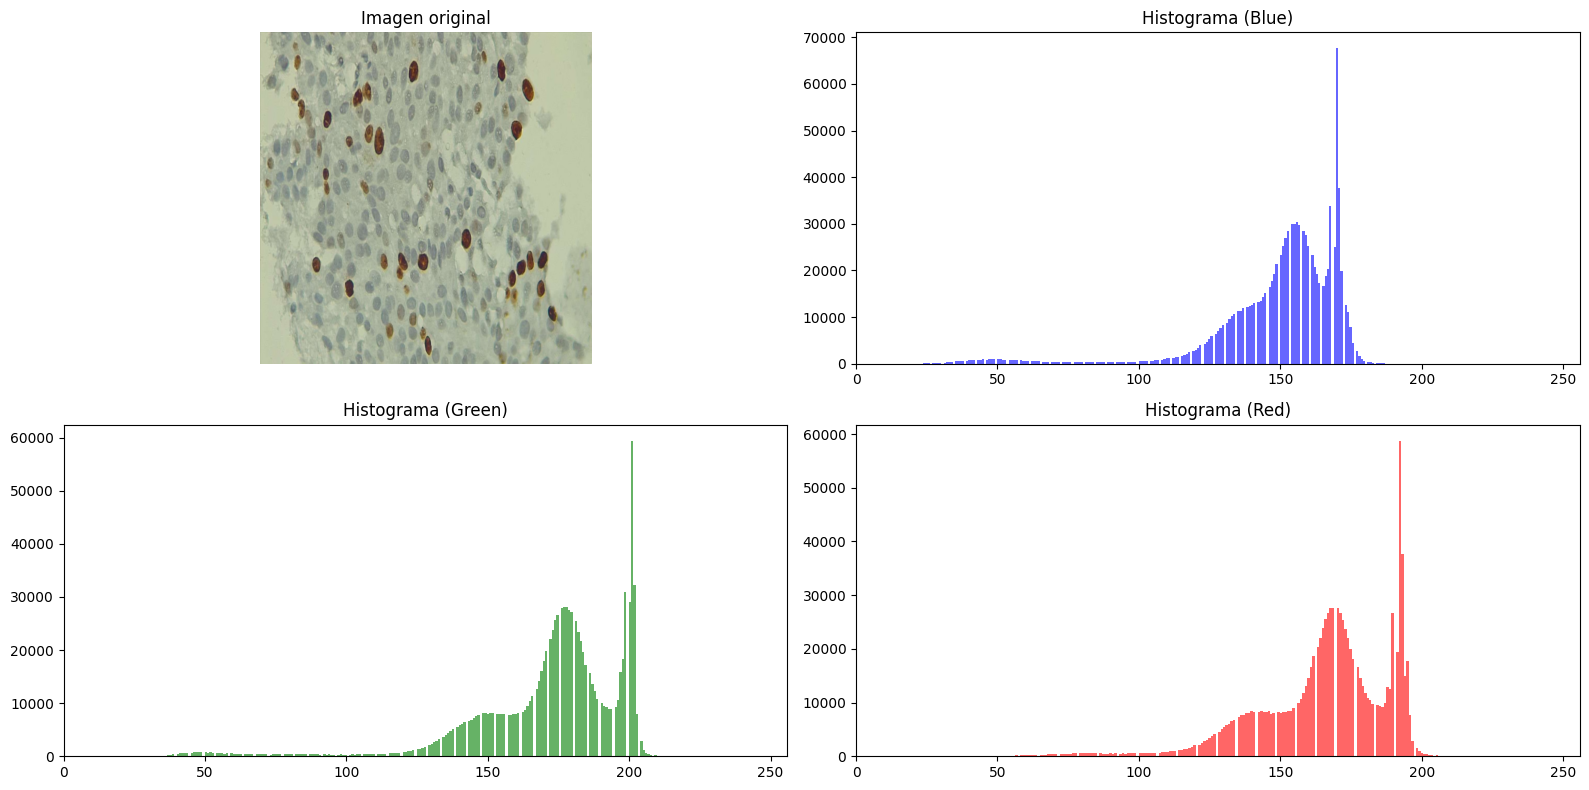

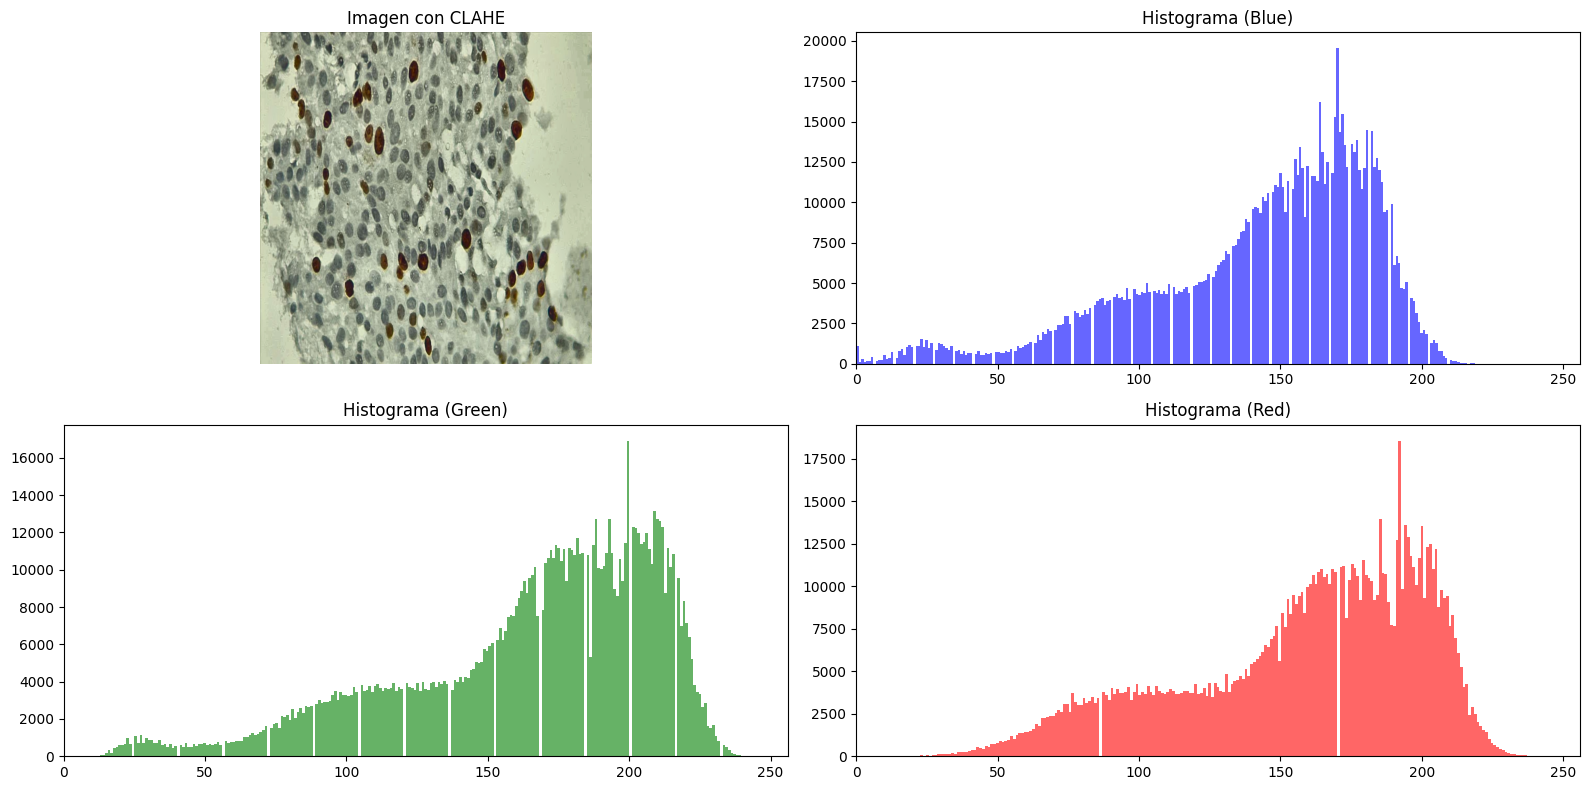

Imagen guardada como: Test1_resize_clahe.jpg


'Test1_resize_clahe.jpg'

In [110]:
# Aplicar CLAHE
img_clahe = preprocessor.apply_clahe(clip_limit=2.0, tile_grid_size=(8, 8))

# mostrar la imagen original
preprocessor.show(title="Imagen original", show_histogram=True)

# Mostrar la imagen procesada
preprocessor.show(img=img_clahe, title="Imagen con CLAHE", show_histogram=True)

# Guardar la imagen procesada con el sufijo "_clahe"
preprocessor.save(img=img_clahe, suffix="clahe")

## Class BinaryImageProcessing

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class BinaryImageProcessor:
    def __init__(self, mask=None, mask_name=None):
        self.mask = mask
        self.mask_name = mask_name

    def read_binary(self, mask_path):
        """
        Leer una imagen binaria desde un archivo.
        """
        self.mask = cv2.imread('mask.tif', cv2.IMREAD_UNCHANGED)
        # hacerla binaria 
        _, self.mask = cv2.threshold(self.mask, 1, 255, cv2.THRESH_BINARY)
        
        self.mask_name = mask_path  # Guardar el nombre de la imagen

        if self.mask is None:
            raise FileNotFoundError(f"No se pudo cargar la imagen: {mask_path}")
        
        # si no es binaria tirar error
        if len(np.unique(self.mask)) != 2:
            raise ValueError("La imagen no es binaria.")
        
        # Asegurar que sea uint8
        self.mask = self.mask.astype(np.uint8)
        
        return self.mask
    
    def show_binary(self, mask=None, title="Imagen binaria"):
        """
        Mostrar una imagen binaria.
        """
        if mask is None:
            mask = self.mask

        plt.imshow(mask, cmap="gray")
        plt.title(title)
        plt.axis("off")
        plt.show()
    
    def save_binary(self, mask, suffix="processed"):
        """
        Guardar una imagen binaria con un sufijo añadido al nombre original.
        """
        if self.mask_name is None:
            raise ValueError("El atributo 'mask_name' no está definido. Usa 'read_binary' primero.")

        # Crear el nuevo nombre con el sufijo
        base_name = self.mask_name.split('.')[0]
        ext = self.mask_name.split('.')[-1]
        new_name = f"{base_name}_{suffix}.{ext}"
        cv2.imwrite(new_name, mask)
        print(f"Imagen binaria guardada como: {new_name}")
        return new_name
    
    def extract_components(self, connectivity=8):
        """
        Extraer componentes conectados de la imagen binaria.
        """
        # Encontrar componentes conectados y estadísticas
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(self.mask, connectivity=connectivity)
        return num_labels, labels, stats, centroids

    def count_objects(self):
        """
        Contar el número de objetos binarios en la máscara usando OpenCV.
        """
        # Encontrar componentes conectados y estadísticas
        _, _, stats, _ = self.extract_components()

        # stats contiene información de cada componente:
        # [x, y, width, height, area]
        areas = stats[1:, -1]  # Omitir el fondo (índice 0) 
        num_objects = len(areas)

        return num_objects 
    
    def average_area(self):
        """
        Calcular el área promedio de los objetos binarios en la máscara.
        """
        _, _, stats, _ = self.extract_components()
        areas = stats[1:, -1]  # Omitir el fondo (índice 0)
        return np.mean(areas) if len(areas) > 0 else 0
    
    def apply_opening(self, kernel_size=3):
        """
        Aplicar una operación morfológica de apertura a la máscara binaria.
        """
        # Crear el kernel y aplicar la apertura
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
        self.mask = cv2.morphologyEx(self.mask, cv2.MORPH_OPEN, kernel)

        self.save_binary(self.mask, suffix="opening")
        return self.mask
    
    def create_binary_from_intensity(self, img, threshold=50):
        """
        Crear una máscara binaria basada en la intensidad de la imagen.
        Retiene solo los objetos más oscuros.
        """
        if img is None:
            raise ValueError("No hay imagen cargada para crear la máscara.")

        # Convertir la imagen a escala de grises
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Crear una máscara binaria basada en el umbral
        _, dark_mask = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY_INV)

        return dark_mask

### 4. Manipulación de imágenes binarias

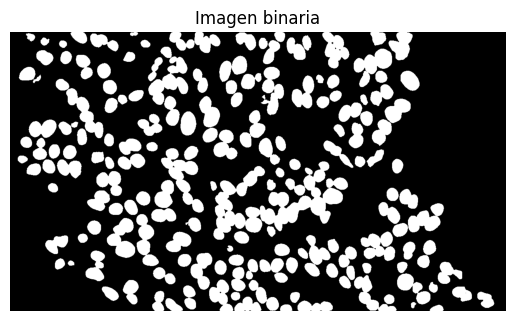

In [112]:
# Crear una instancia de la clase
binary_processor = BinaryImageProcessor(mask_name='mask.tif')

# Leer una imagen binaria
mask = binary_processor.read_binary('mask.tif')

# Mostrar la imagen binaria
binary_processor.show_binary()

In [113]:
# Contar objetos
num_objects = binary_processor.count_objects()
print("Número de objetos:", num_objects)

# Calcular el área promedio
avg_area = binary_processor.average_area()
print("Área promedio:", avg_area)

Número de objetos: 156
Área promedio: 1690.173076923077


Aplica una operación morfológica de apertura utilizando un kernel con forma de elipse.  
Esto elimina el ruido (pequeños objetos desconectados) y suaviza los contornos de los objetos en la máscara.

Imagen binaria guardada como: mask_opening.tif


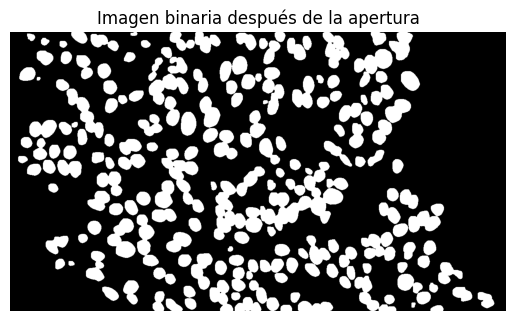

Número de objetos después de la apertura: 162
Área promedio después de la apertura: 1611.4135802469136


In [114]:
# Aplicar apertura
binary_processor.apply_opening(kernel_size=8)

# Mostrar la imagen binaria después de la apertura
binary_processor.show_binary(title="Imagen binaria después de la apertura")

# Contar objetos después de la apertura
num_objects_opening = binary_processor.count_objects()
print("Número de objetos después de la apertura:", num_objects_opening)

# Calcular el área promedio después de la apertura
avg_area_opening = binary_processor.average_area()
print("Área promedio después de la apertura:", avg_area_opening)


## Clase ImageCombination

In [115]:
class ImageCombination:
    def __init__(self, img=None, mask=None):
        self.img = img
        self.mask = mask

    def combine_with_image(self, mask_color=(255, 0, 0)):
        """
        Combinar la máscara binaria con una imagen original, coloreando las áreas de la máscara.
        """
        if self.mask is None:
            raise ValueError("No hay máscara binaria cargada.")
        if self.img is None:
            raise ValueError("No hay imagen original cargada.")

        # Asegurarse de que la imagen original tenga el mismo tamaño que la máscara
        if self.mask.shape != self.img.shape[:2]:
            raise ValueError("La máscara binaria y la imagen original deben tener el mismo tamaño.")

        # Crear una máscara de color
        color_mask = np.zeros_like(self.img)
        color_mask[self.mask > 0] = mask_color  # Aplicar el color solo donde hay máscara

        # Fusionar la máscara con la imagen original
        combined_img = cv2.addWeighted(self.img, 0.7, color_mask, 0.3, 0)
        return combined_img

### 5. Combinar la máscara binaria con la imagen original

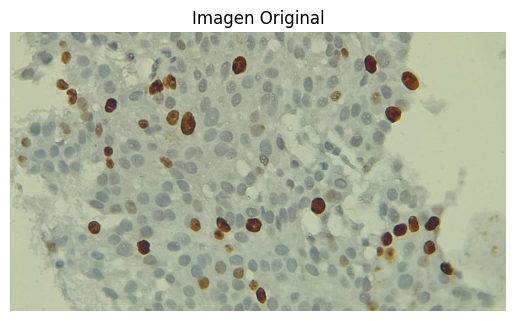

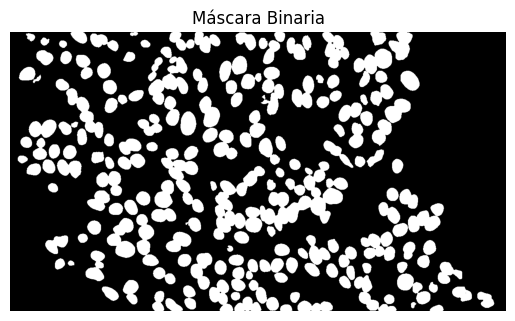

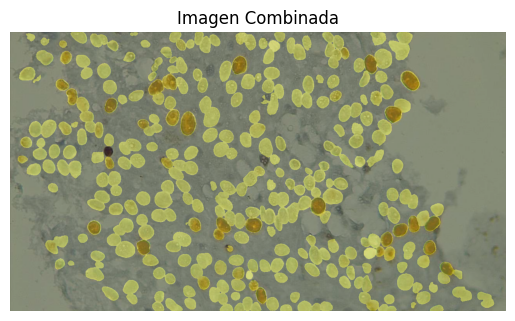

In [116]:
# Leer la imagen original
processor = Preprocess()
img = processor.read('Test1.jpg')
processor.show(title="Imagen Original")

# Leer la máscara binaria
binary_processor = BinaryImageProcessor()
mask = binary_processor.read_binary('mask.tif')
binary_processor.show_binary(title="Máscara Binaria")

# Combinar la máscara binaria con la imagen original
combined_processor = ImageCombination(img, mask)
combined_img = combined_processor.combine_with_image(mask_color=(0, 255, 255))

# Mostrar la imagen combinada
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Combinada")
plt.axis("off")
plt.show()

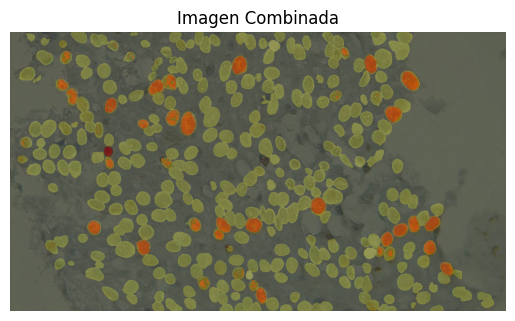

In [117]:
# Leer la máscara binaria
binary_processor2 = BinaryImageProcessor()
dark_mask = binary_processor2.create_binary_from_intensity(img, threshold=100)

# Combinar la máscara binaria con la imagen original
combined_processor2 = ImageCombination(combined_img, dark_mask)
combined_img2 = combined_processor2.combine_with_image(mask_color=(0, 0, 255))

# Mostrar la imagen combinada
plt.imshow(cv2.cvtColor(combined_img2, cv2.COLOR_BGR2RGB))
plt.title("Imagen Combinada")
plt.axis("off")
plt.show()

### 6. Describir las características de la imagen de máscara Mask.tif, indicar el tipo de variable y la forma en que se realizó el conteo de objetos

**Características de la Imagen**
- Formato: *mask.tif* es una imagen binaria (valores únicos: 0 y 255).
- Tipo de variable: La máscara se almacena como un array de NumPy de tipo uint8 (enteros sin signo de 8 bits).
- Dimensiones: La forma de la imagen (mask.shape) es de (720x1280) píxeles.

In [118]:
mask = binary_processor.read_binary('mask.tif')

# tipo de variable 
print("Tipo de variable:", type(mask))
# tipo de datos
print("Tipo de datos:", mask.dtype)
# tamaño de la mascara
print("Dimensiones de la imagen:", mask.shape)

Tipo de variable: <class 'numpy.ndarray'>
Tipo de datos: uint8
Dimensiones de la imagen: (720, 1280)


**Proceso de Conteo de Objetos**

El conteo de objetos se realiza mediante la función `cv2.connectedComponentsWithStats`, que detecta componentes conectados en una imagen binaria y calcula sus estadísticas.

Pasos del Proceso:
1. Leer y Asegurar que la Imagen Sea Binaria
2. Detección de Componentes Conectados: Se utiliza `cv2.connectedComponentsWithStats` para encontrar los componentes conectados en la imagen binaria. Esta función devuelve:
   - `num_labels`: Número total de etiquetas, incluyendo el fondo.
   - `labels`: Imagen etiquetada con identificadores únicos para cada componente.
   - `stats`: Estadísticas de cada componente (x, y, width, height, area).
   - `centroids`: Coordenadas de los centroides de cada componente.
3. Conteo de Objetos: El número de objetos se calcula excluyendo el fondo (etiqueta 0)
4. Cálculo del Área Promedio
5. Apertura Morfológica: Se aplica una operación morfológica de apertura para eliminar ruido o componentes pequeños. Esto ayuda a refinar la máscara antes de repetir el conteo de objetos.